In [ ]:
import geopandas as gpd
import pandas as pd

In [12]:
df_agebs = gpd.read_file("./agebs.geojson").to_crs("EPSG:6372")

In [13]:
df_industries = (
    pd.read_csv(
        "/Users/rodolfofigueroa/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/jobs/denue_2023_estimaciones.csv",
        usecols=["codigo_act", "num_empleos_esperados", "longitud", "latitud"],
    )
    .assign(geometry=lambda df: gpd.points_from_xy(df["longitud"], df["latitud"]))
    .drop(columns=["longitud", "latitud"])
)

df_industries = gpd.GeoDataFrame(
    df_industries,
    geometry="geometry",
    crs="EPSG:4326",
).to_crs("EPSG:6372")

df_industries = df_industries.sjoin(
    df_agebs[["geometry"]],
    how="inner",
    predicate="within",
).drop(columns=["index_right"])

In [14]:
wanted_codes = [
    "22",
    "31",
    "32",
    "33",
    "5622",
]
df_industries_filtered = df_industries[
    df_industries["codigo_act"]
    .astype(str)
    .apply(
        lambda x: any(x.startswith(code) for code in wanted_codes),
    )
]

In [21]:
df_industries_filtered

,codigo_act,num_empleos_esperados,geometry
473196,315223,3.000000,POINT (2082056.014 2176040.915)
473199,314991,3.000000,POINT (2076846.756 2191447.529)
473200,314991,7.461575,POINT (2076300.733 2191262.01)
473206,314991,3.000000,POINT (2081352.179 2179795.411)
473209,314991,3.000000,POINT (2080882.285 2182392.554)
...,...,...,...
541631,562221,3.000000,POINT (2084982.654 2184093.238)
545176,562221,17.032184,POINT (2073933.306 2176895.758)
547570,562221,17.032184,POINT (2075413.804 2176298.456)
548030,562221,17.032184,POINT (2074923.437 2176361.964)


<Axes: >

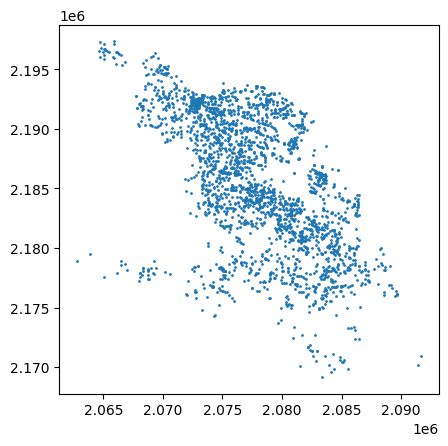

In [20]:
df_industries_filtered.plot(markersize=1)